<a href="https://colab.research.google.com/github/Akshansh8/Machine-Learning/blob/main/MNIST_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from six.moves import urllib
import tensorflow as tf
import tensorflow_datasets.public_api as tfds
from tensorflow_datasets import testing
from tensorflow_datasets.image_classification import mnist
import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))




11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [25]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [22]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle competitions download Digit Recognizer

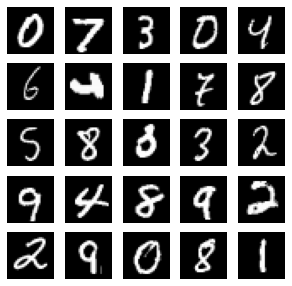

In [7]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [8]:
num_labels = len(np.unique(y_train))

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [11]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [12]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [13]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

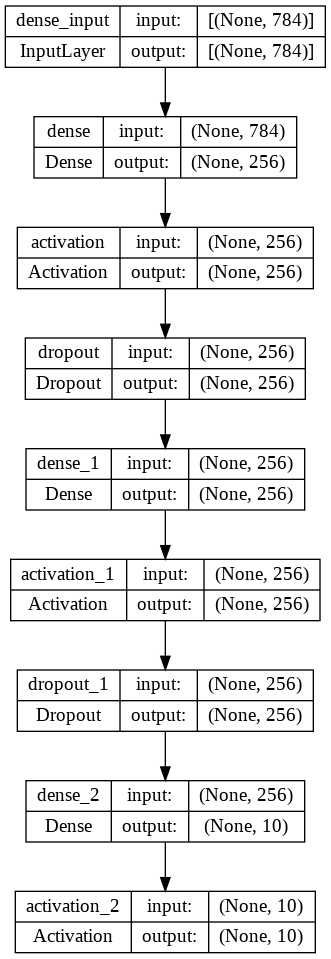

In [15]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4218 - accuracy: 0.8681
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1914 - accuracy: 0.9423
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1497 - accuracy: 0.9548
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1265 - accuracy: 0.9611
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1150 - accuracy: 0.9642
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1003 - accuracy: 0.9689
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0934 - accuracy: 0.9711
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9726
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0833 - accuracy: 0.9742
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9754

In [19]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9808

Test accuracy: 98.1%


In [20]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))